# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.328702e+01     1.540073e+01
 * time: 0.004067897796630859
     1     6.443001e+01     9.079048e+00
 * time: 0.012147903442382812
     2     5.642469e+01     1.384478e+01
 * time: 0.03180503845214844
     3     4.203373e+01     1.007122e+01
 * time: 0.05923104286193848
     4     3.159066e+01     8.559088e+00
 * time: 0.21309804916381836
     5     2.989094e+01     8.570479e+00
 * time: 0.23632097244262695
     6     1.415465e+01     3.383848e+00
 * time: 0.26199984550476074
     7     9.705103e+00     1.894385e+00
 * time: 0.28249192237854004
     8     8.668864e+00     2.210074e+00
 * time: 0.30232882499694824
     9     8.121184e+00     2.063328e+00
 * time: 0.3214089870452881
    10     7.484374e+00     1.996272e+00
 * time: 0.34145188331604004
    11     7.287798e+00     1.503339e+00
 * time: 0.35724592208862305
    12     7.165636e+00     9.607757e-01
 * time: 0.372967004776001
    13     7.081389e+00     9.648524e-01
 * time: 

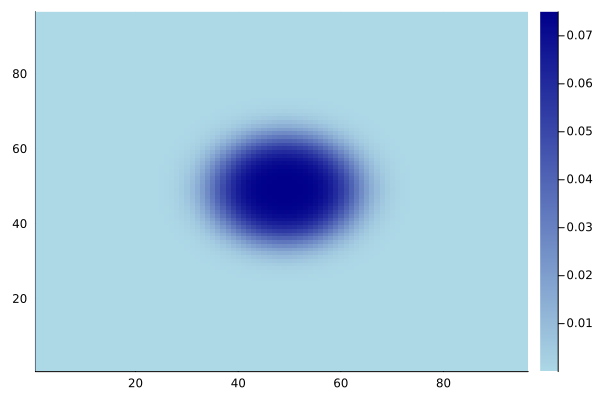

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)